In [1]:
#Import dependencies
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow

In [2]:
#Call the wrangle function to read in the dataset
df = wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,tax_amount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [3]:
df.drop(columns=['tax_amount'], inplace=True)

In [4]:
#Split the data before performing scaling on the train portion
seed = 42

train, valid_test = train_test_split(df, test_size=0.3,
                                     random_state=seed)

valid, test = train_test_split(valid_test, test_size=0.5,
                               random_state=seed)

In [5]:
X_train = train.drop(columns=['home_value'])

In [6]:
#Looking at the value counts for bathrooms
X_train['bathrooms'].value_counts()

2.00     659587
3.00     295566
1.00     288904
2.50     100129
4.00      57290
1.50      21923
3.50      19960
5.00      19869
4.50      13575
6.00       7491
5.50       4306
7.00       3095
0.00       3021
8.00       1186
6.50        917
9.00        487
7.50        274
10.00       222
11.00        92
8.50         80
12.00        46
9.50         33
13.00        31
14.00        16
15.00        16
0.50         12
16.00        11
18.00         7
10.50         7
20.00         3
1.75          3
12.50         1
17.00         1
11.50         1
19.50         1
32.00         1
Name: bathrooms, dtype: int64

In [7]:
#Create an arbitrary subset that's easier to work with
train_subset = X_train[X_train['bathrooms'] <= 8]

## Exercise 1

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [8]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(train_subset)

train_mms = mms.transform(train_subset)

In [9]:
#Is there a mistake here?
pd.DataFrame(train_mms, columns=list(train_subset.columns)).head()

,bedrooms,bathrooms,sq_ft,year_built,fips
0,0.166667,0.250,0.001523,0.832558,0.0
1,0.166667,0.250,0.001324,0.706977,0.0
2,0.166667,0.125,0.001518,0.679070,0.0
3,0.166667,0.250,0.001472,0.762791,1.0
4,0.166667,0.250,0.001527,0.744186,0.0


Text(0.5, 1.0, 'Scaled')

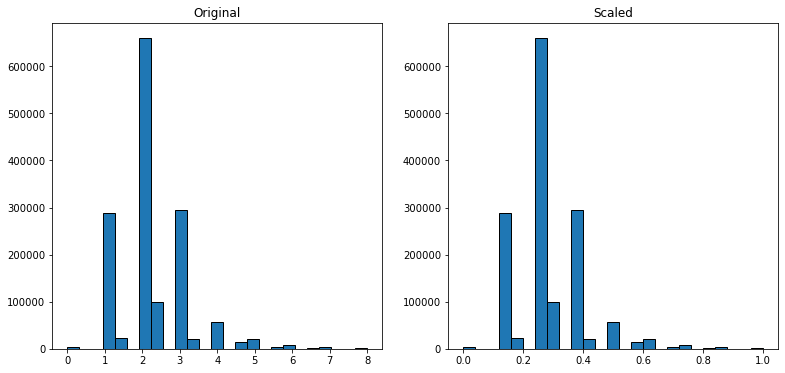

In [10]:
#Visualize the difference between unscaled/scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_mms[:,1], bins=25, ec='black')
plt.title('Scaled')

In [11]:
#Assign the standard scaler to a variable and fit/transform the train data
ss = sklearn.preprocessing.StandardScaler()

ss.fit(train_subset)

train_ss = ss.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

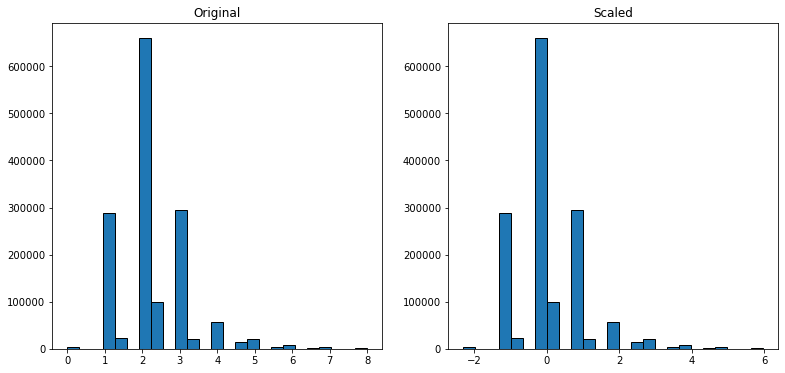

In [12]:
#Visualize the difference
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_ss[:,1], bins=25, ec='black')
plt.title('Scaled')

In [13]:
#Assign the robust scaler to a variable and fit/transform the train data
rs = sklearn.preprocessing.RobustScaler()

rs.fit(train_subset)

train_rs = rs.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

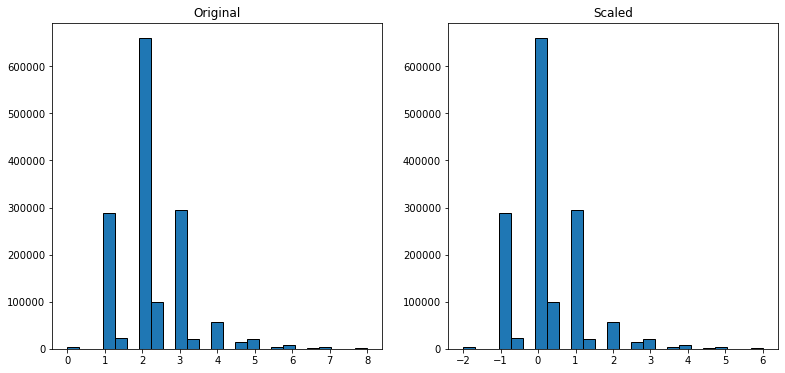

In [14]:
#Visualize the data before and after robust scaling
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_rs[:,1], bins=25, ec='black')
plt.title('Scaled')

## Exercise 2

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [15]:
#Apply inverse_transform
rs.inverse_transform(train_rs)

array([[3.000e+00, 2.000e+00, 1.452e+03, 1.980e+03, 6.037e+03],
       [3.000e+00, 2.000e+00, 1.262e+03, 1.953e+03, 6.037e+03],
       [3.000e+00, 1.000e+00, 1.447e+03, 1.947e+03, 6.037e+03],
       ...,
       [3.000e+00, 3.000e+00, 1.517e+03, 1.948e+03, 6.037e+03],
       [2.000e+00, 1.000e+00, 1.390e+03, 1.922e+03, 6.037e+03],
       [3.000e+00, 2.000e+00, 2.070e+03, 1.977e+03, 6.037e+03]])

In [24]:
pd.DataFrame(rs.inverse_transform(train_rs))

,0,1,2,3,4
0,3.0,2.0,1452.0,1980.0,6037.0
1,3.0,2.0,1262.0,1953.0,6037.0
2,3.0,1.0,1447.0,1947.0,6037.0
3,3.0,2.0,1403.0,1965.0,6111.0
4,3.0,2.0,1456.0,1961.0,6037.0
...,...,...,...,...,...
1497103,3.0,2.0,1281.0,1988.0,6037.0
1497104,4.0,2.0,1630.0,1949.0,6037.0
1497105,3.0,3.0,1517.0,1948.0,6037.0
1497106,2.0,1.0,1390.0,1922.0,6037.0


In [16]:
#Compare to the original data
train_subset.head()

,bedrooms,bathrooms,sq_ft,year_built,fips
1001601,3.0,2.0,1452.0,1980.0,6037.0
611989,3.0,2.0,1262.0,1953.0,6037.0
658616,3.0,1.0,1447.0,1947.0,6037.0
835115,3.0,2.0,1403.0,1965.0,6111.0
242295,3.0,2.0,1456.0,1961.0,6037.0


## Exercise 3

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
#Assign the quantile transformer to a variable, and fit/transform the training data
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

qt.fit(train_subset)

train_qt = qt.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

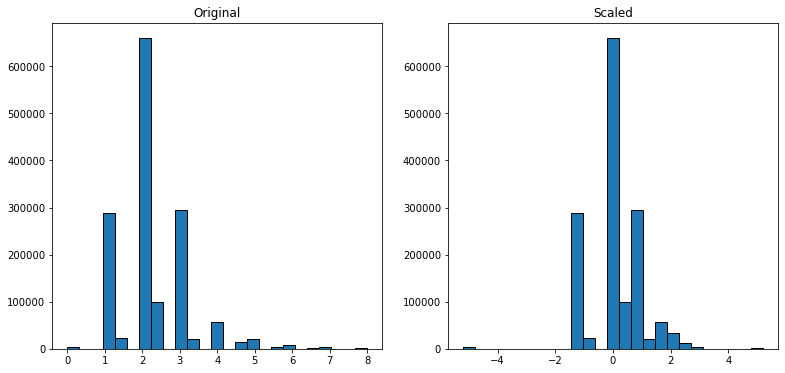

In [18]:
#Visualize the results of normalized quantile transformation
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt[:,1], bins=25, ec='black')
plt.title('Scaled')

## Exercise 4

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [19]:
#Perform the same steps with the quantile transformer, this time without normalization
qt2 = sklearn.preprocessing.QuantileTransformer()

qt2.fit(train_subset)

train_qt2 = qt2.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

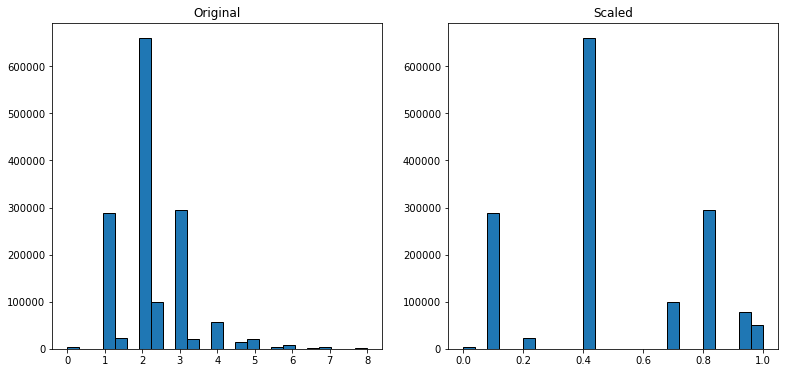

In [20]:
#Visualize the results
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt2[:,1], bins=25, ec='black')
plt.title('Scaled')

Since I already removed most outliers during the brief exploration phase, I will employ the MinMaxScaler on my dataset.

## Exercise 5

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [21]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedrooms', 'bathrooms', 'sq_ft']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [22]:
#Test my function
train_s, valid_s, test_s = scale_data(train, valid, test)

In [23]:
#See if the results make sense
train_s.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,fips
1001601,0.166667,0.06250,0.001523,241012.0,1980.0,6037.0
611989,0.166667,0.06250,0.001324,235630.0,1953.0,6037.0
658616,0.166667,0.03125,0.001518,435123.0,1947.0,6037.0
835115,0.166667,0.06250,0.001472,268770.0,1965.0,6111.0
242295,0.166667,0.06250,0.001527,365000.0,1961.0,6037.0
